## Imports

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub


import os

from sklearn.model_selection import train_test_split


# Downland Dataset

In [59]:
# Download latest version
path = kagglehub.dataset_download("kundanbedmutha/exam-score-prediction-dataset")

PATH = os.path.join(path, 'Exam_Score_Prediction.csv')
print("Path to dataset files:", PATH)

Path to dataset files: /home/franio/.cache/kagglehub/datasets/kundanbedmutha/exam-score-prediction-dataset/versions/2/Exam_Score_Prediction.csv


# Getting Data, tiding up data and data split

In [60]:
data = pd.read_csv(PATH)
data.drop('student_id', axis=1, inplace=True) # We do not need it
data.drop(data[data['gender'] == 'other'].index, inplace=True)

y = data['exam_score']
X = data.drop('exam_score', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

x_train

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
1747,20,male,b.sc,5.57,43.4,no,5.4,average,self-study,high,easy
2351,23,female,diploma,3.52,61.1,yes,4.6,poor,coaching,high,moderate
7551,20,female,b.tech,1.83,58.6,yes,9.3,average,group study,medium,moderate
13665,19,male,b.tech,7.17,44.1,yes,4.5,poor,coaching,medium,hard
10989,23,male,b.tech,5.06,86.1,yes,8.7,poor,coaching,high,easy
...,...,...,...,...,...,...,...,...,...,...,...
18021,20,male,bca,0.39,58.0,yes,6.0,good,online videos,low,moderate
7776,23,female,b.tech,2.44,74.7,no,5.1,good,self-study,high,moderate
8106,20,female,bba,0.90,92.3,no,9.3,good,group study,high,hard
1304,21,male,bba,7.51,72.8,no,4.7,poor,coaching,high,easy


# Feature Engineering
Some data is qualitative, so we need to make it quantitative

## Qualitative data

In [61]:
qualitative_features_name = ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
unique_qualitative_features = {}

for feature in qualitative_features_name:
    unique_qualitative_features[feature] = data[feature].unique()

unique_qualitative_features = pd.DataFrame.from_dict(unique_qualitative_features, orient='index')
unique_qualitative_features

,0,1,2,3,4,5,6
gender,male,female,None,None,None,None,None
course,diploma,b.sc,b.tech,bba,ba,b.com,bca
internet_access,yes,no,None,None,None,None,None
sleep_quality,poor,good,average,None,None,None,None
study_method,coaching,mixed,online videos,self-study,group study,None,None
facility_rating,low,high,medium,None,None,None,None
exam_difficulty,hard,moderate,easy,None,None,None,None


## Feature Engineering

In [62]:
data_copy = data.copy()

# Binary Features
data_copy['gender'] = data['gender'].map({'male': 1, 'female': 0})
data_copy['internet_access'] = data['internet_access'].map({'yes': 1, 'no': 0})

data_copy

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,1,diploma,2.78,92.9,1,7.4,poor,coaching,low,hard,58.9
2,22,1,b.sc,7.88,76.8,1,8.5,poor,coaching,high,moderate,90.3
4,20,0,diploma,0.89,71.6,1,9.8,poor,coaching,low,moderate,43.7
5,23,1,b.tech,3.48,65.4,1,4.2,good,mixed,low,moderate,58.2
6,17,0,b.tech,1.35,69.0,1,7.4,average,online videos,high,hard,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19992,17,1,b.com,5.74,81.4,1,7.5,good,online videos,high,hard,95.0
19993,19,0,ba,3.28,73.3,1,9.5,good,group study,high,easy,93.9
19996,18,1,b.com,3.71,41.6,0,5.9,average,coaching,medium,moderate,60.9
19998,19,1,bba,4.60,76.3,0,6.1,good,self-study,medium,moderate,79.0


# Data Exploration and Visualisations

## Target Data

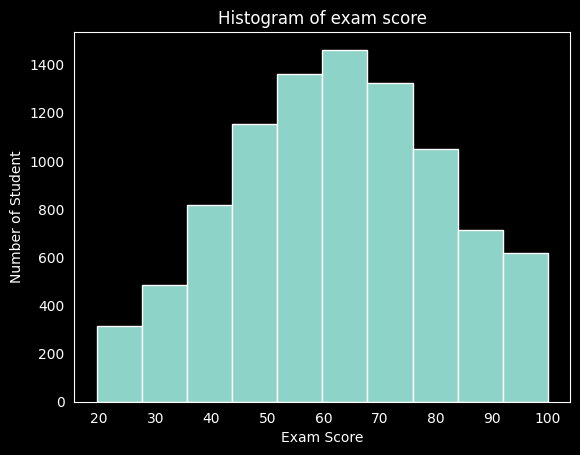

In [63]:
plt.hist(y_train)
plt.grid(False)
plt.title('Histogram of exam score')
plt.ylabel('Number of Student')
plt.xlabel('Exam Score')
plt.show()

## Correlation matrix

In [64]:
names = x_train.columns
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')
plt.matshow(corr_mtx, cmap="RdBu_r")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

ValueError: could not convert string to float: 'male'